# Kaggle @ Halloween

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams["figure.figsize"] = 20,10

In [3]:
train = pd.read_csv('../../Dataset/Halloween/train.csv')
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
n_training = train.size
n_feature = train.shape[1] - 1
print 'Number of training examples: {}'.format(n_training)
print 'Number of features: {}'.format(n_feature)

Number of training examples: 2597
Number of features: 6


### Data Wrangling

In [5]:
print 'Are there any null values?... Answer is : {}'.format(pd.isnull(train).sum().sum == 0)

Are there any null values?... Answer is : False


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [7]:
train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [8]:
y = train.pop('type')
y.head()

0     Ghoul
1    Goblin
2     Ghoul
3     Ghoul
4     Ghost
Name: type, dtype: object

In [9]:
y = y.astype('category').cat.codes
print y.shape

(371,)


In [10]:
train = pd.get_dummies(train)
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0,0.354512,0.350839,0.465761,0.781142,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.575560,0.425868,0.531401,0.439899,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.467875,0.354330,0.811616,0.791225,1.0,0.0,0.0,0.0,0.0,0.0
3,4,0.776652,0.508723,0.636766,0.884464,1.0,0.0,0.0,0.0,0.0,0.0
4,5,0.566117,0.875862,0.418594,0.636438,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
train_id = train.pop('id')

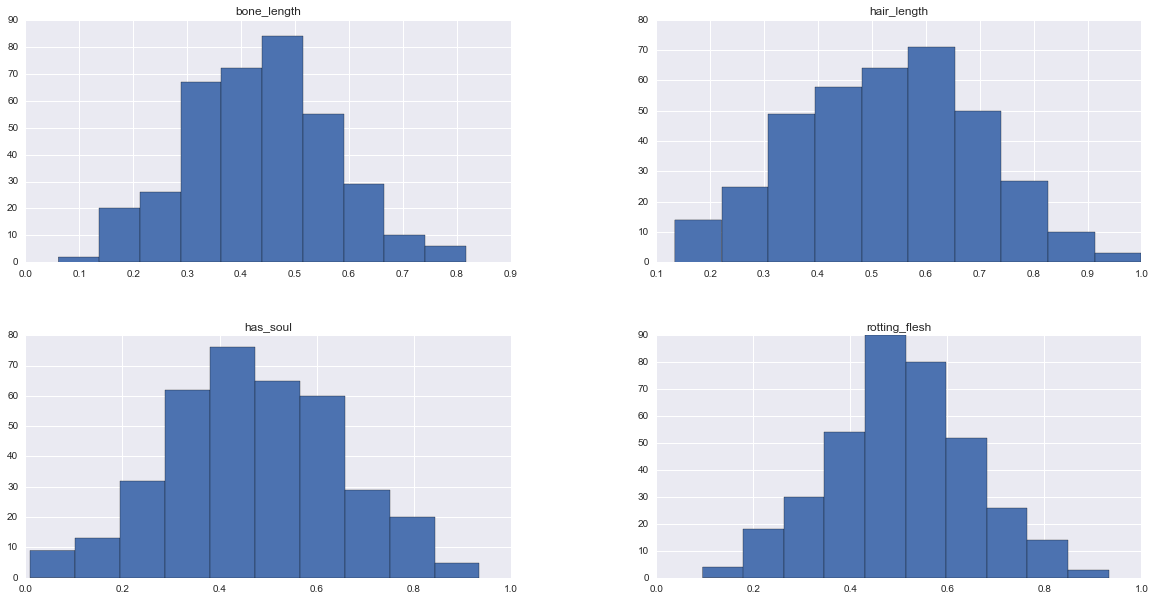

In [12]:
train[[i for i in train.columns if not i.startswith('color')]].hist()
plt.show()

### Data Visualisation

(371, 3)


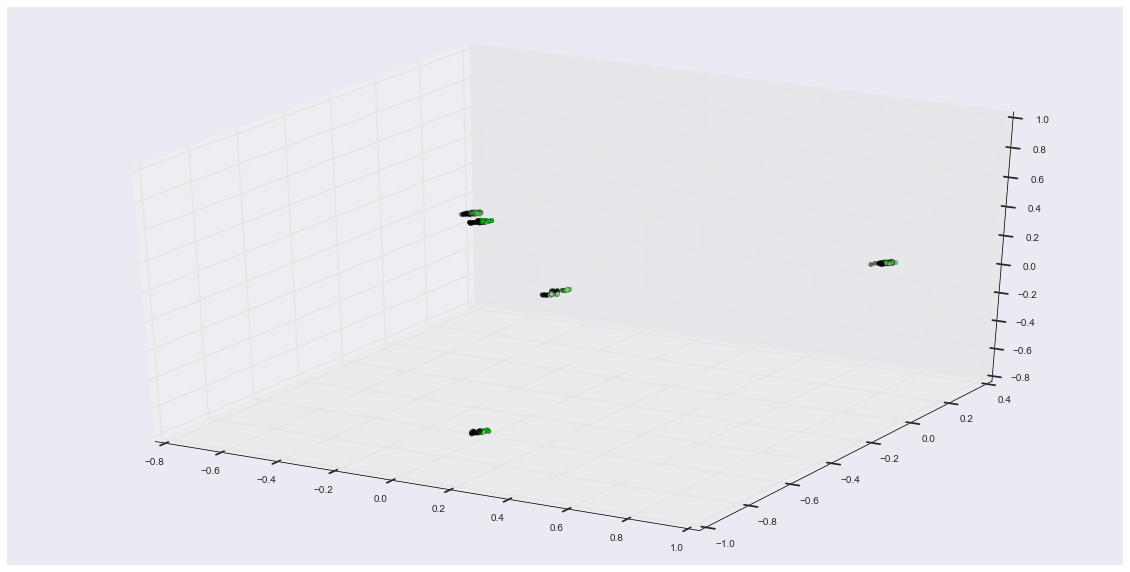

In [80]:
## Visualising the data by reduving the number of features
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(train,y)
T = pca.transform(train)
print T.shape
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
ax = figure.add_subplot(111,projection='3d')
ax.scatter(T[:,0],T[:,1],T[:,2],c=y,cmap='spectral')
plt.show()

(371, 3)


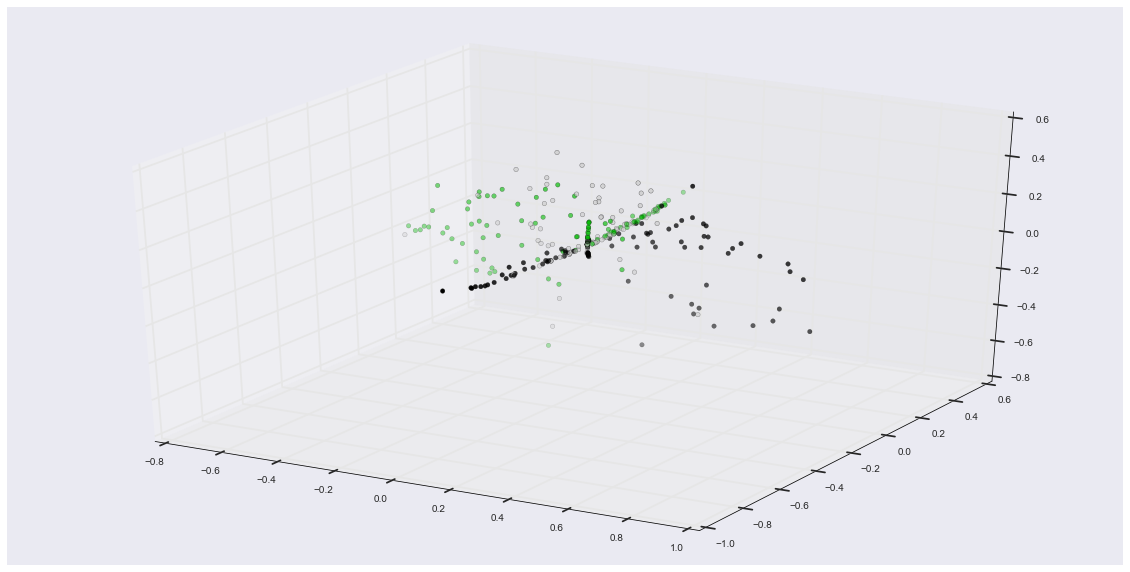

In [83]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors = 5,n_components=3)
iso.fit(train,y)
T = iso.transform(train)
print T.shape
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
ax = figure.add_subplot(111,projection='3d')
ax.scatter(T[:,0],T[:,1],T[:,2],c=y,cmap='spectral')

In [90]:
## Plotting with parallel coordinates to find out any outliers
from pandas.tools.plotting import parallel_coordinates
data = pd.read_csv('../../Dataset/Halloween/train.csv')
data.pop('id')
data['color'] = data.color.astype('category').cat.codes
data.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,3,Ghoul
1,0.575560,0.425868,0.531401,0.439899,4,Goblin
2,0.467875,0.354330,0.811616,0.791225,0,Ghoul
3,0.776652,0.508723,0.636766,0.884464,0,Ghoul
4,0.566117,0.875862,0.418594,0.636438,4,Ghost


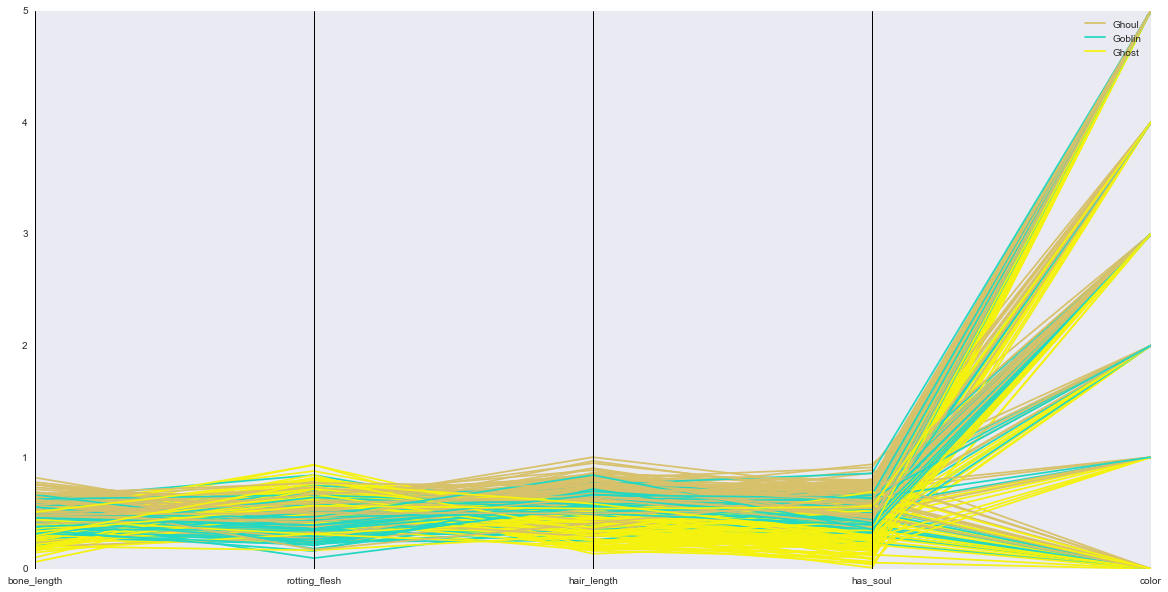

In [91]:
parallel_coordinates(data,'type')

No outliers present

### Model Selection

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout

In [85]:
models = [LogisticRegression(),LDA(),QDA(),SVC(),XGBClassifier(),RandomForestClassifier(n_estimators=100)]

In [86]:
from sklearn.cross_validation import cross_val_score

In [87]:
for model in models:
    print model
    scores = cross_val_score(model,train,y,cv=5)
    print '5-fold CV Accuracy: {}%'.format(round(scores.mean(),5)*100)
    print '='*50

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
5-fold CV Accuracy: 69.27%
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
5-fold CV Accuracy: 71.673%
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)
5-fold CV Accuracy: 60.383%
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
5-fold CV Accuracy: 63.893%
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_chi

In [17]:
model = Sequential([
        Dense(64,input_dim=10),
        Activation('sigmoid'),
        Dense(3),
        Activation('softmax'),
    ])

In [18]:
y_one_hot = pd.get_dummies(y)
print y_one_hot.shape

(371, 3)


In [19]:
from sklearn.cross_validation import train_test_split
X_train,X_cv,y_train,y_cv = train_test_split(train,y_one_hot,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(259, 10) (259, 3)


In [20]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(X_train.values,y_train.values,nb_epoch=200,batch_size=32,verbose=0)

In [22]:
print 'Accuracy: {}%'.format((model.predict_classes(X_cv.values) == np.argmax(y_cv.values,axis=1)).mean()*100)

112/112 [==============================] - 0s     
Accuracy: 73.2142857143%


Neural network produces the highest accuracy (suggesting some form of non linear decision boundary). Thus we will go on with the Neural Network

### Neural Network Parameter Tuning

In [23]:
model = Sequential([
        Dense(64,input_dim=10),
        Activation('sigmoid'),
        Dense(256),
        Activation('sigmoid'),
        Dropout(0.5),
        Dense(3),
        Activation('softmax'),
    ])

In [24]:
from sklearn.cross_validation import train_test_split
X_train,X_cv,y_train,y_cv = train_test_split(train,y_one_hot,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(259, 10) (259, 3)


In [25]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.fit(X_train.values,y_train.values,nb_epoch=2000,batch_size=32,verbose=0)

In [27]:
print 'Training Accuracy: {}%'.format(model.evaluate(X_train.values,y_train.values,batch_size=32,verbose=1)[1]*100)
print 'Testing Accuracy: {}%'.format(model.evaluate(X_cv.values,y_cv.values,batch_size=32,verbose=1)[1]*100)

259/259 [==============================] - 0s     
Training Accuracy: 75.6756756757%
112/112 [==============================] - 0s     
Testing Accuracy: 75.0%


### Ensembling the Neural Network and XGB Classifier

In [55]:
X_train,X_cv,y_train,y_cv = train_test_split(train.values,y.values,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(259, 10) (259,)


In [66]:
xgb = XGBClassifier(n_estimators=300)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [67]:
xgb.score(X_cv,y_cv)

0.7232142857142857

In [68]:
X_train,X_cv,y_train,y_cv = train_test_split(train.values,y_one_hot.values,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(259, 10) (259, 3)


In [69]:
model = Sequential([
        Dense(64,input_dim=10),
        Activation('sigmoid'),
        Dense(256),
        Activation('sigmoid'),
        Dropout(0.5),
        Dense(3),
        Activation('softmax'),
    ])
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,nb_epoch=2000,batch_size=32,verbose=0)

In [73]:
print 'Ensembling Test Score: {}%'.format((np.argmax((xgb.predict_proba(X_cv)+model.predict_proba(X_cv))/2,axis=1) == \
                                   np.argmax(y_cv,axis=1)).mean()*100)

112/112 [==============================] - 0s     
Ensembling Test Score: 75.0%
